# Train Deep Learning Networks on OLID Dataset

In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Load the dataset

**Labels:**
- OFF = Offensive = 1 
- NOT = Not Offensive = 0

In [2]:
raw_data = pd.read_csv('../Dataset-OLID/OLIDv1.0/data_subtask_a.csv')
raw_data.head(10)

,Unnamed: 0,id,tweet,subtask_a,label_a
0,0,86426,@USER She should ask a few native Americans wh...,OFF,1
1,1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,1
2,2,16820,Amazon is investigating Chinese employees who ...,NOT,0
3,3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,1
4,4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,0
5,5,97670,@USER Liberals are all Kookoo !!!,OFF,1
6,6,77444,@USER @USER Oh noes! Tough shit.,OFF,1
7,7,52415,@USER was literally just talking about this lo...,OFF,1
8,8,45157,@USER Buy more icecream!!!,NOT,0
9,9,13384,@USER Canada doesn’t need another CUCK! We alr...,OFF,1


In [3]:
train_tweets = raw_data.drop(["Unnamed: 0", "id", "subtask_a"], axis=1)
train_tweets.head(10)

,tweet,label_a
0,@USER She should ask a few native Americans wh...,1
1,@USER @USER Go home you’re drunk!!! @USER #MAG...,1
2,Amazon is investigating Chinese employees who ...,0
3,"@USER Someone should'veTaken"" this piece of sh...",1
4,@USER @USER Obama wanted liberals &amp; illega...,0
5,@USER Liberals are all Kookoo !!!,1
6,@USER @USER Oh noes! Tough shit.,1
7,@USER was literally just talking about this lo...,1
8,@USER Buy more icecream!!!,0
9,@USER Canada doesn’t need another CUCK! We alr...,1


## Towards Data Science: [Twitter Sentiment Analysis using NLTK, Python](https://towardsdatascience.com/twitter-sentiment-analysis-classification-using-nltk-python-fa912578614c)

In [4]:
# Imports

#Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

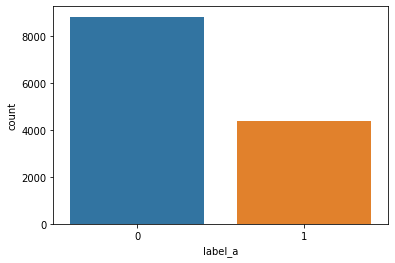

In [5]:
sns.countplot(x='label_a', data=train_tweets)

#### Data Preprocessing and Feature Engineering

- removal of punctuations
- removal of commonly used words (stopwords)
- normalization of words

In [6]:
import nltk
nltk.download(['stopwords','punkt', 'wordnet'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kcava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kcava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kcava\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
# Punctuations

def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)

print("Processed: ", form_sentence(train_tweets['tweet'].iloc[10]))
print("Original: ", train_tweets['tweet'].iloc[10])


#â ireland consumer price index mom climbed from previous 0.2 to 0.5 in may blog silver gold forex
#â #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex


Processed:  USER USER USER It ’ s not my fault you support gun control
Original:  @USER @USER @USER It’s not my fault you support gun control


In [8]:
# Stopwords

def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    return clean_mess
print(no_user_alpha(form_sentence(train_tweets['tweet'].iloc[10])))
print(train_tweets['tweet'].iloc[10])


#['ireland', 'consumer', 'price', 'index', 'mom', 'climbed', 'previous', 'may', 'blog', 'silver', 'gold', 'forex']
#â #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex


['USER', 'USER', 'USER', 'fault', 'support', 'gun', 'control']
@USER @USER @USER It’s not my fault you support gun control


In [9]:
# Lexicon Normalization

def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
tweet_list = 'I was playing with my friends with whom I used to play, when you called me yesterday'.split()
print(normalization(tweet_list))
print(tweet_list)

#['I', 'be', 'play', 'with', 'my', 'friends', 'with', 'whom', 'I', 'use', 'to', 'play,', 'when', 'you', 'call', 'me', 'yesterday']


['I', 'be', 'play', 'with', 'my', 'friends', 'with', 'whom', 'I', 'use', 'to', 'play,', 'when', 'you', 'call', 'me', 'yesterday']
['I', 'was', 'playing', 'with', 'my', 'friends', 'with', 'whom', 'I', 'used', 'to', 'play,', 'when', 'you', 'called', 'me', 'yesterday']


#### Vectorization and Model Selection
- we have to numerically represent the preprocessed data
- techniques for vectorization of words: 
    - count vefctorization
    - Tf-IDF transformation

In [10]:
# Model Pipeline

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

NameError: name 'text_processing' is not defined

In [ ]:
msg_train, msg_test, label_train, label_test = train_test_split(train_tweets['tweet'], train_tweets['label'], test_size=0.2)
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))